In [ ]:
import sys

sys.path.append("..")
from src.embeddings import (
    load_embeddings,
    build_matrices,
    align_embeddings,
)
from src.utils import save_matrix, load_dict
from src.evaluation import test_vocabulary
import matplotlib.pyplot as plt
import pickle


In [ ]:
# en_twi = load_dictionary(file_dir="../data/processed/twi_dict_processed.csv", pos=False)

In [ ]:
# dictionary = dict(zip(en_twi["english"], en_twi["twi"]))

In [ ]:
# keys = list(dictionary.keys())
# train_keys, test_keys = train_test_split(keys, test_size=0.2, random_state=42)

# train_dict = dict((k, dictionary[k]) for k in train_keys)
# test_dict = dict((k, dictionary[k]) for k in test_keys)


In [ ]:
train_dict = load_dict(train_dict)
test_dict = load_dict(test_dict)

In [9]:
en_embeddings = load_embeddings("../data/embeddings/glove.6B.100d.txt")
twi_embeddings = load_embeddings(
    "../data/embeddings/twi_fasttext_4M_akan_dim_100.vec", fasttext=True
)

400000it [00:09, 44130.94it/s]


Loaded embeddings from ../data/embeddings/glove.6B.100d.txt...


100%|██████████| 121232/121232 [00:03<00:00, 39792.08it/s]

Loaded embeddings from ../data/embeddings/twi_fasttext_4M_akan_dim_100.vec...


In [ ]:
with open("../models/english_vecs.pkl", "wb") as f:
    pickle.dump(en_embeddings, f)

with open("../models/twi_vecs.pkl", "wb") as f:
    pickle.dump(en_embeddings, f)

In [ ]:
X_train, Y_train = build_matrices(train_dict, en_embeddings, twi_embeddings)

In [13]:
R, losses, iterations = align_embeddings(X_train, Y_train, steps=5000, lr=0.80)

loss at iteration 0 is: 33.1505
loss at iteration 100 is: 2.9231
loss at iteration 200 is: 1.1593
loss at iteration 300 is: 0.8085
loss at iteration 400 is: 0.7080
loss at iteration 500 is: 0.6710
loss at iteration 600 is: 0.6547
loss at iteration 700 is: 0.6467
loss at iteration 800 is: 0.6424
loss at iteration 900 is: 0.6399
loss at iteration 1000 is: 0.6385
loss at iteration 1100 is: 0.6375
Early stopping at iteration 1196, loss did not improve for 20 steps.
Loss at early stopping: 0.6370


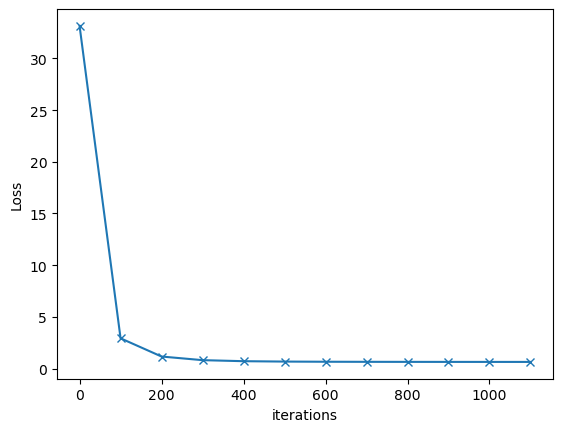

In [ ]:
plt.plot(iterations, losses, marker="x")
plt.xlabel("iterations")
plt.ylabel("Loss")
plt.title("Loss vs Iterations")
plt.savefig("../results/figures")
plt.show()

In [ ]:
save_matrix(R, "projection_matrix")

In [ ]:
X_test,Y_test = build_matrices(test_dict,en_embeddings,twi_embeddings)

In [ ]:
accuracy = test_vocabulary(X_test,Y_test,R)
print(f"Test accuracy: {accuracy:.2%}")